In [1]:
"""
@author: pho
"""
%load_ext autoreload
%autoreload 2
import sys
import importlib

import numpy as np
import pandas as pd

## Panel:
import param
import panel as pn
from panel.viewable import Viewer

## Pho's Custom Libraries:
from pyphocorehelpers.general_helpers import PrettyPrintable, get_arguments_as_optional_dict
from pyphocorehelpers.function_helpers import compose_functions

from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import * # get_neuron_identities
from pyphoplacecellanalysis.General.SessionSelectionAndFiltering import batch_filter_session
from pyphoplacecellanalysis.General.ComputationResults import ComputationResult
# from PendingNotebookCode import estimation_session_laps


from neuropy.analyses.laps import estimation_session_laps
from neuropy.core.epoch import NamedTimerange

# Neuropy:
from neuropy.analyses.placefields import PlacefieldComputationParameters, perform_compute_placefields
from neuropy.core.neuron_identities import NeuronIdentity, build_units_colormap, PlotStringBrevityModeEnum
from neuropy.utils.debug_helpers import debug_print_placefield, debug_print_spike_counts, debug_print_subsession_neuron_differences

# def estimate_session_laps_load_function(regular_load_function, a_base_dir):
#     session = regular_load_function(a_base_dir)
#     ## Estimate the Session's Laps data using my algorithm from the loaded position data.
#     session = estimation_session_laps(session)
#     return session

known_data_session_type_dict = {'kdiba':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: DataSessionLoader.kdiba_old_format_session(a_base_dir)),
                               basedir=Path(r'R:\data\KDIBA\gor01\one\2006-6-07_11-26-53')),
                'bapun':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: DataSessionLoader.bapun_data_session(a_base_dir)),
                               basedir=Path('R:\data\Bapun\Day5TwoNovel'))
               }

known_data_session_type_dict['kdiba'].post_load_functions = [lambda a_loaded_sess: estimation_session_laps(a_loaded_sess)]
# known_data_session_type_dict = {'kdiba':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: estimation_session_laps(DataSessionLoader.kdiba_old_format_session(a_base_dir))),
#                                basedir=Path(r'R:\data\KDIBA\gor01\one\2006-6-07_11-26-53')),
#                 'bapun':KnownDataSessionTypeProperties(load_function=(lambda a_base_dir: DataSessionLoader.bapun_data_session(a_base_dir)),
#                                basedir=Path('R:\data\Bapun\Day5TwoNovel'))
#                }

# known_data_session_type_dict['kdiba'].name

neuropy module not found, adding directory to sys.path. 
 >> Updated sys.path.


In [2]:
# curr_bapun_pipeline = NeuropyPipeline(name='bapun_pipeline', session_data_type='bapun', basedir=known_data_session_type_dict['bapun'].basedir, load_function=known_data_session_type_dict['bapun'].load_function)
curr_bapun_pipeline = NeuropyPipeline.init_from_known_data_session_type('bapun', known_data_session_type_dict['bapun'])

# curr_bapun_pipeline = NeuropyPipeline.init_from_known_data_session_type('bapun', known_data_session_type_dict['bapun'])
curr_bapun_pipeline.is_loaded
size_bytes = curr_bapun_pipeline.sess.__sizeof__() # 1753723032
f'object size: {size_bytes/(1024*1024)} MB'

basedir is already Path object.
	 basepath: R:\data\Bapun\Day5TwoNovel
	 session_name: RatS-Day5TwoNovel-2020-12-04_07-55-09
converting neuron_type strings to core.neurons.NeuronType objects...
	 done.
Issue with pickled POSIX_PATH on windows for path R:\data\Bapun\Day5TwoNovel\RatS-Day5TwoNovel-2020-12-04_07-55-09.probegroup.npy, falling back to non-pickled version...
Position falling back to legacy loading protocol...: dict_rep: {'traces': array([[-50.946354, -50.946354, -50.946354, ..., -45.350155, -45.350155,
        -45.350155],
       [-50.646282, -50.646282, -50.646282, ...,  64.150757,  64.150757,
         64.150757],
       [  7.124897,   7.124897,   7.124897, ...,   5.571329,   5.571329,
          5.571329]]), 'computed_traces': array([[nan, nan, nan, ..., nan, nan, nan]]), 't_start': 0, 'sampling_rate': 60, 'metadata': None}
linearized position loaded from file.
Loading success: .flattened.spikes.npy.
Loading success: .ripple.npy.
Loading success: .mua.npy.
Loading success: 

'object size: 1672.480613708496 MB'

In [3]:
# KDiba Old Format:
## Data must be pre-processed using the MATLAB script located here: 
# R:\data\KDIBA\gor01\one\IIDataMat_Export_ToPython_2021_11_23.m
# From pre-computed .mat files:
## 07: 
# basedir = r'R:\data\KDIBA\gor01\one\2006-6-07_11-26-53'
# # ## 08:
# basedir = r'R:\data\KDIBA\gor01\one\2006-6-08_14-26-15'
# curr_kdiba_pipeline = NeuropyPipeline(name='kdiba_pipeline', session_data_type='kdiba', basedir=known_data_session_type_dict['kdiba'].basedir, load_function=known_data_session_type_dict['kdiba'].load_function)
curr_kdiba_pipeline = NeuropyPipeline.init_from_known_data_session_type('kdiba', known_data_session_type_dict['kdiba'])

# curr_bapun_pipeline
curr_kdiba_pipeline.is_loaded
size_bytes = curr_kdiba_pipeline.sess.__sizeof__() # 1753723032
f'object size: {size_bytes/(1024*1024)} MB'
# ## Estimate the Session's Laps data using my algorithm from the loaded position data.
# curr_kdiba_pipeline.sess = estimation_session_laps(curr_kdiba_pipeline.sess)
curr_kdiba_pipeline.sess.epochs

basedir is already Path object.
	 basepath: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53
	 session_name: 2006-6-07_11-26-53
Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.epochs_info.mat...
done.
Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position_info.mat...
done.
Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.spikes.mat...
done.
Failure loading .position.npy. Must recompute.

Computing linear positions for all active epochs for session...
curr_active_epoch_timeslice_indicies: Int64Index([   27,    28,    29,    30,    31,    32,    33,    34,    35,
               36,
            ...
            52139, 52140, 52141, 52142, 52143, 52144, 52145, 52146, 52147,
            52148],
           dtype='int64', length=52122)
 	 np.shape(curr_active_epoch_timeslice_indicies): (52122,)
curr_active_epoch_timeslice_indicies: Int64Index([52149, 52150, 52151, 52152, 521

C:\Users\Pho\repos\NeuroPy\neuropy\core\position.py:142: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  included_indicies = self._data['t'].between(t_start, t_stop, inclusive=True) # returns a boolean array indicating inclusion in teh current lap
C:\Users\Pho\repos\NeuroPy\neuropy\core\position.py:142: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  included_indicies = self._data['t'].between(t_start, t_stop, inclusive=True) # returns a boolean array indicating inclusion in teh current lap


2006-6-07_11-26-53.interpolated_spike_positions.npy saved
	 done.

Loading matlab import file: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.laps_info.mat...
done.
setting laps object.
session.laps loaded successfully!
desc_crossings_x: (24,), asc_crossings_x: (24,)


         start         stop  label     duration
0     0.000000  1739.153364  maze1  1739.153364
1  1739.153364  1932.420005  maze2   193.266641

In [ ]:
# # Combining post_load_functions example:
# post_load_functions = [lambda a_loaded_sess: estimation_session_laps(a_loaded_sess), lambda a_loaded_sess: a_loaded_sess.filtered_by_neuron_type('pyramidal')]
# composed_post_load_function = compose_functions(*post_load_functions) # functions are composed right-to-left (math order)
# composed_post_load_function(curr_kdiba_pipeline.sess)

In [4]:
# Truely Common:
def _display_result(computation_result):
    pf_neuron_identities, pf_sort_ind, pf_colors, pf_colormap, pf_listed_colormap = get_neuron_identities(computation_result.computed_data['pf2D'])
    computation_result.computed_data['pf2D'].plot_raw(label_cells=True); # Plots an overview of each cell all in one figure
    computation_result.computed_data['pf2D'].plot_ratemaps_2D(resolution_multiplier=2.5, brev_mode=PlotStringBrevityModeEnum.MINIMAL)

    

In [ ]:
# Bapun/DataFrame style session filter functions:
def _temp_filter_session_by_epoch1(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze1')
    ## All Spikes:
    # active_epoch_session = sess.filtered_by_epoch(active_epoch) # old
    active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch())
    return active_session, active_epoch

def _temp_filter_session_by_epoch2(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze2')
    ## All Spikes:
    # active_epoch_session = sess.filtered_by_epoch(active_epoch) # old
    active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch())
    return active_session, active_epoch


active_session_filter_configurations = {'maze1':_temp_filter_session_by_epoch1,
                                        'maze2':_temp_filter_session_by_epoch2
                                       }

curr_bapun_pipeline.filter_sessions(active_session_filter_configurations)
curr_bapun_pipeline.perform_computations(PlacefieldComputationParameters(speed_thresh=0.0, grid_bin=(5, 3), smooth=(0.0, 0.0), frate_thresh=0.1))

In [ ]:
_display_result(curr_bapun_pipeline.computation_results['maze1'])

In [ ]:
_display_result(curr_bapun_pipeline.computation_results['maze2'])

In [5]:
def _temp_filter_session_by_epoch1(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze1')
    ## All Spikes:
    active_session = sess.filtered_by_epoch(active_epoch) # kdiba
    # active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch())
    return active_session, active_epoch

def _temp_filter_session_by_epoch2(sess):
    """ 
    Usage:
        active_session, active_epoch = _temp_filter_session(curr_bapun_pipeline.sess)
    """
    active_epoch = sess.epochs.get_named_timerange('maze2')
    ## All Spikes:
    active_session = sess.filtered_by_epoch(active_epoch) # kdiba
    # active_session = batch_filter_session(sess, sess.position, sess.spikes_df, active_epoch.to_Epoch()) # new Bapun/Df
    return active_session, active_epoch

active_session_filter_configurations = {'maze1':_temp_filter_session_by_epoch1,
                                        'maze2':_temp_filter_session_by_epoch2
                                       }


curr_kdiba_pipeline.filter_sessions(active_session_filter_configurations)
curr_kdiba_pipeline.perform_computations(PlacefieldComputationParameters(speed_thresh=0.0, grid_bin=(5, 3), smooth=(0.0, 0.0), frate_thresh=0.1))

Applying session filter named "maze1"...
Constraining to epoch with times (start: 0.0, end: 1739.1533641185379)
Applying session filter named "maze2"...
Constraining to epoch with times (start: 1739.1533641185379, end: 1932.4200048116618)
Performing single_computation on filtered_session with filter named "maze1"...
Recomputing active_epoch_placefields... 

C:\Users\Pho\repos\NeuroPy\neuropy\utils\mixins\time_slicing.py:55: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  curr_lap_position_df_is_included = self._obj[self.time_variable_name].between(curr_slice_t_start, curr_slice_t_stop, inclusive=True) # returns a boolean array indicating inclusion


	 done.
Recomputing active_epoch_placefields2D... 	 done.
Performing single_computation on filtered_session with filter named "maze2"...
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.


In [ ]:
def build_lap_epochs_filters(sess):
    lap_specific_epochs = sess.laps.as_epoch_obj()
    # lap_specific_epochs.to_dataframe()
    any_lap_specific_epochs = lap_specific_epochs.label_slice(lap_specific_epochs.labels[np.arange(len(sess.laps.lap_id))])
    even_lap_specific_epochs = lap_specific_epochs.label_slice(lap_specific_epochs.labels[np.arange(0, len(sess.laps.lap_id), 2)])
    odd_lap_specific_epochs = lap_specific_epochs.label_slice(lap_specific_epochs.labels[np.arange(1, len(sess.laps.lap_id), 2)])
    
    ## All Spikes:
    sess.epochs.t_start = 22.26 # exclude the first short period where the animal isn't on the maze yet
    # sess.epochs.to_dataframe()
    # active_epoch = sess.epochs.get_named_timerange('maze1')
    # print('active_epoch: {}'.format(active_epoch))
    # active_epoch = sess.epochs.get_named_timerange('maze2')
    # active_epoch_maze_all = NamedTimerange(name='maze', start_end_times=[sess.epochs['maze1'][0], sess.epochs['maze2'][1]])

    # active_epoch_session = sess.filtered_by_neuron_type('pyramidal').filtered_by_epoch(active_epoch)
    # print_subsession_neuron_differences(sess.neurons, active_epoch_session.neurons)

    active_session_filter_configurations = {'maze1': lambda x: (x.filtered_by_neuron_type('pyramidal').filtered_by_epoch(x.epochs.get_named_timerange('maze1')), x.epochs.get_named_timerange('maze1')),
                                        'maze2': lambda x: (x.filtered_by_neuron_type('pyramidal').filtered_by_epoch(x.epochs.get_named_timerange('maze2')), x.epochs.get_named_timerange('maze2')),
                                        'maze': lambda x: (x.filtered_by_neuron_type('pyramidal').filtered_by_epoch(NamedTimerange(name='maze', start_end_times=[x.epochs['maze1'][0], x.epochs['maze2'][1]])), NamedTimerange(name='maze', start_end_times=[x.epochs['maze1'][0], x.epochs['maze2'][1]]))
                                       }
    return active_session_filter_configurations
    
active_session_filter_configurations = build_lap_epochs_filters(curr_kdiba_pipeline.sess)
curr_kdiba_pipeline.filter_sessions(active_session_filter_configurations)

In [ ]:
def debug_plot_filtered_subsession_neuron_differences(sess, filtered_sess):
    print_subsession_neuron_differences(sess.neurons, active_epoch_session.neurons)

[debug_plot_filtered_subsession_neuron_differences(curr_kdiba_pipeline.sess, a_filtered_sess) for a_filtered_sess in curr_kdiba_pipeline.filtered_sessions]

In [ ]:
curr_kdiba_pipeline.computation_results['maze2']

The specified cmap supports less colors than n_neurons (supports 7, n_neurons: 64). An extended colormap will be built.
data_aspect_ratio: (3.636363636363637, Width_Height_Tuple(width=240.0, height=65.99999999999999))
page_grid_sizes: [RowColTuple(num_rows=8, num_columns=8)]
resolution_multiplier: 2.5, required_figure_size: (160.0, 20.0)
page_idx: 0
The specified cmap supports less colors than n_neurons (supports 7, n_neurons: 64). An extended colormap will be built.
data_aspect_ratio: (7.777777777777778, Width_Height_Tuple(width=140.0, height=18.0))
page_grid_sizes: [RowColTuple(num_rows=8, num_columns=8)]
resolution_multiplier: 2.5, required_figure_size: (160.0, 20.0)
page_idx: 0


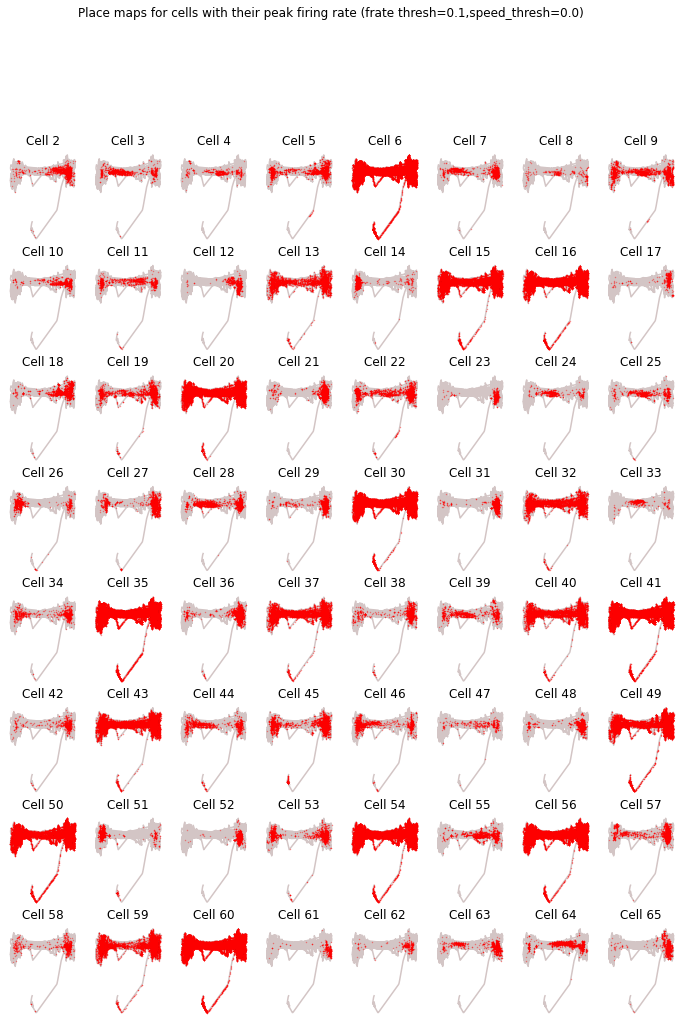

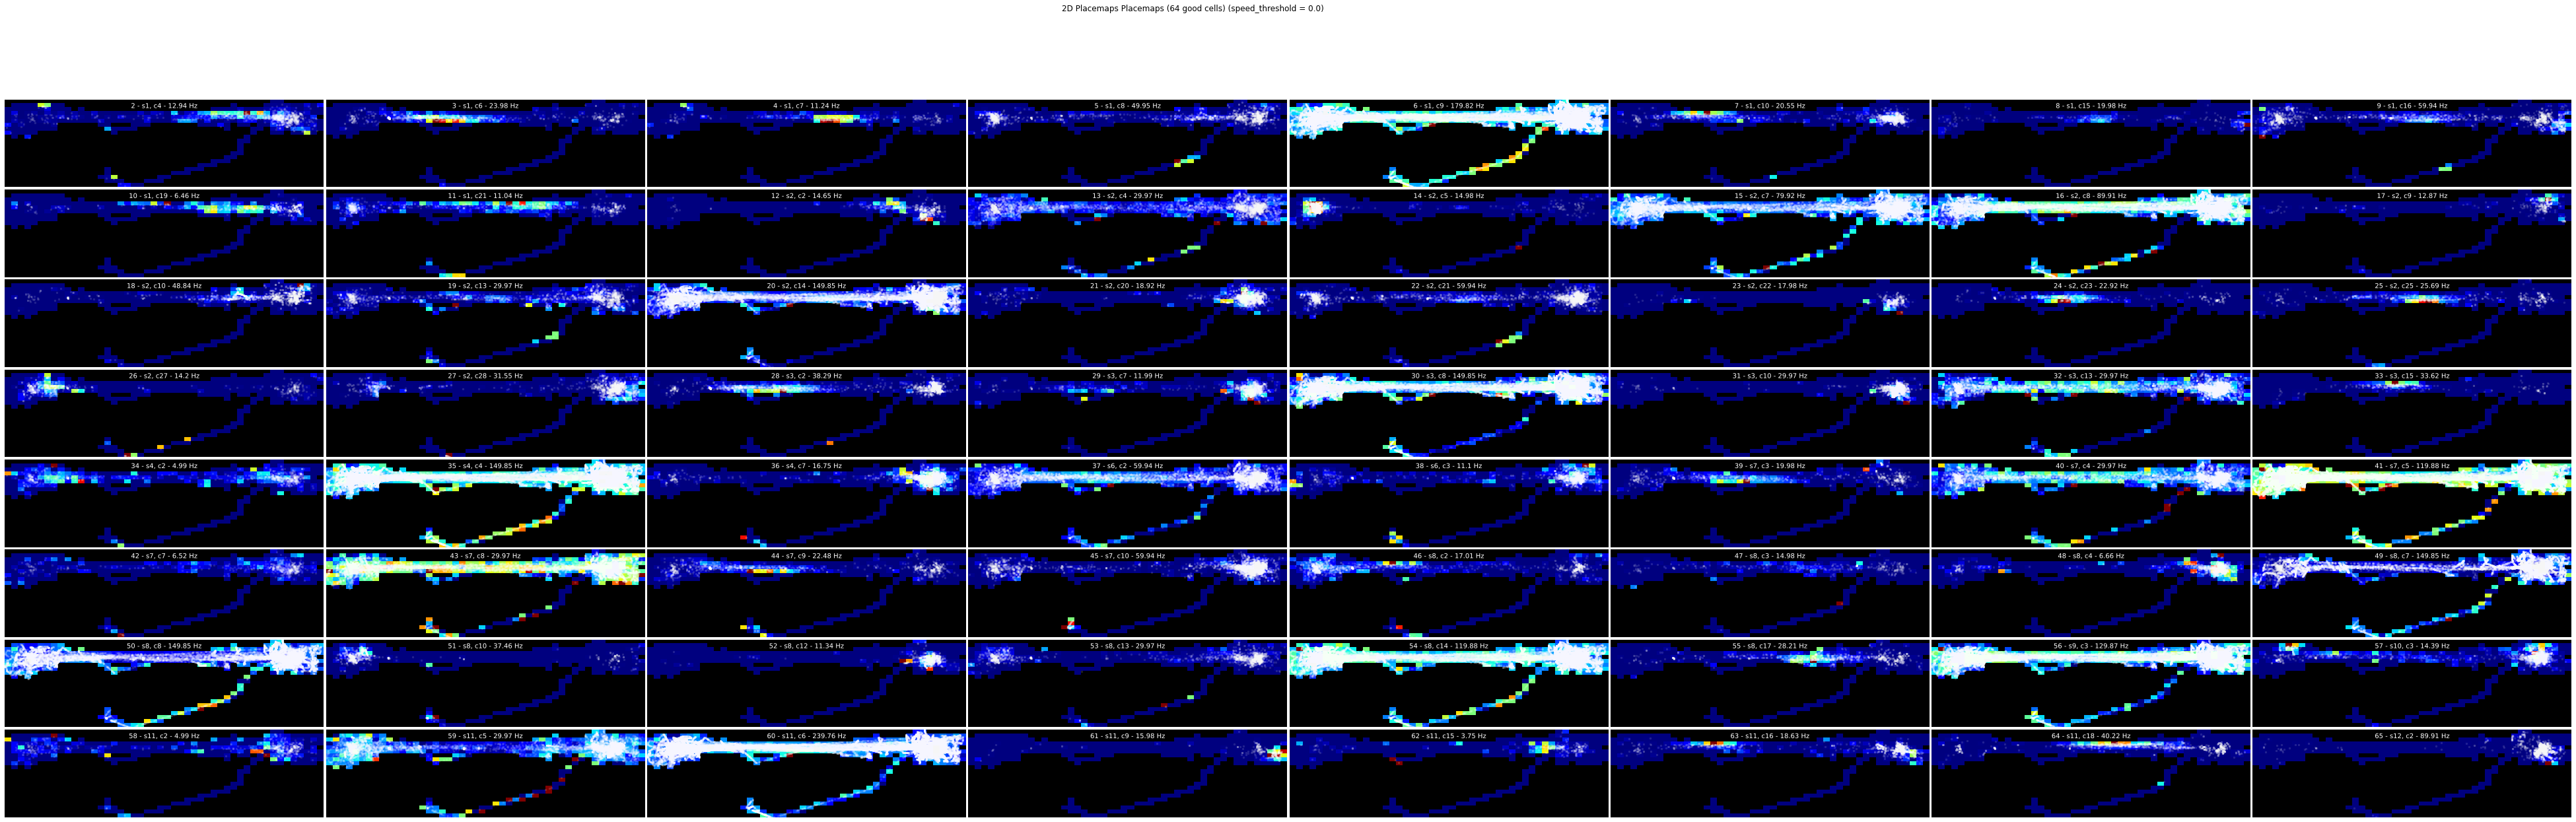

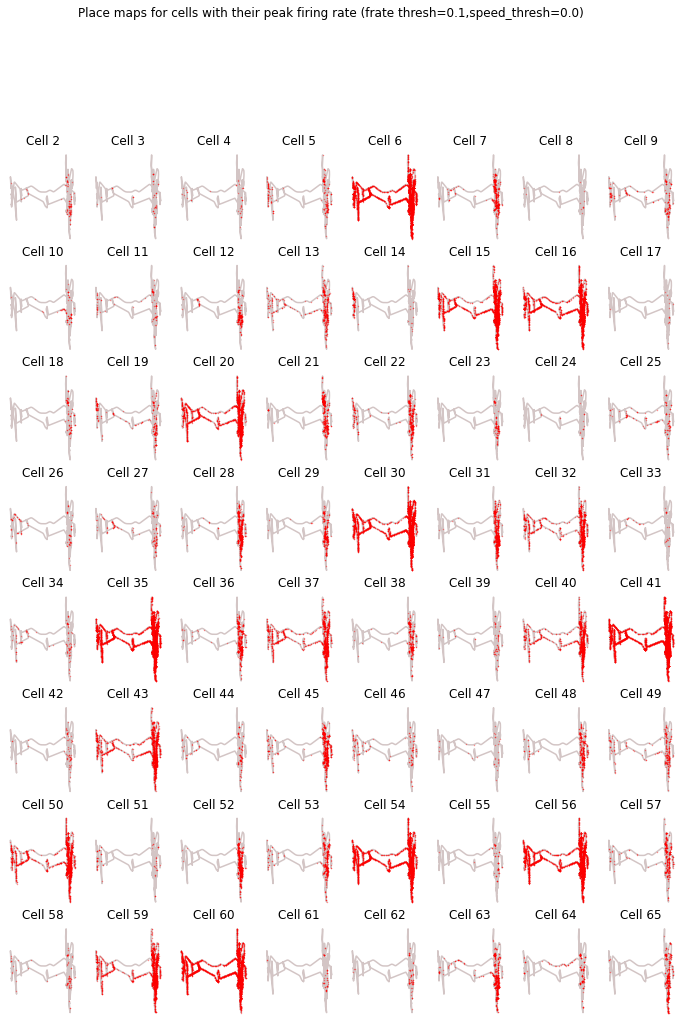

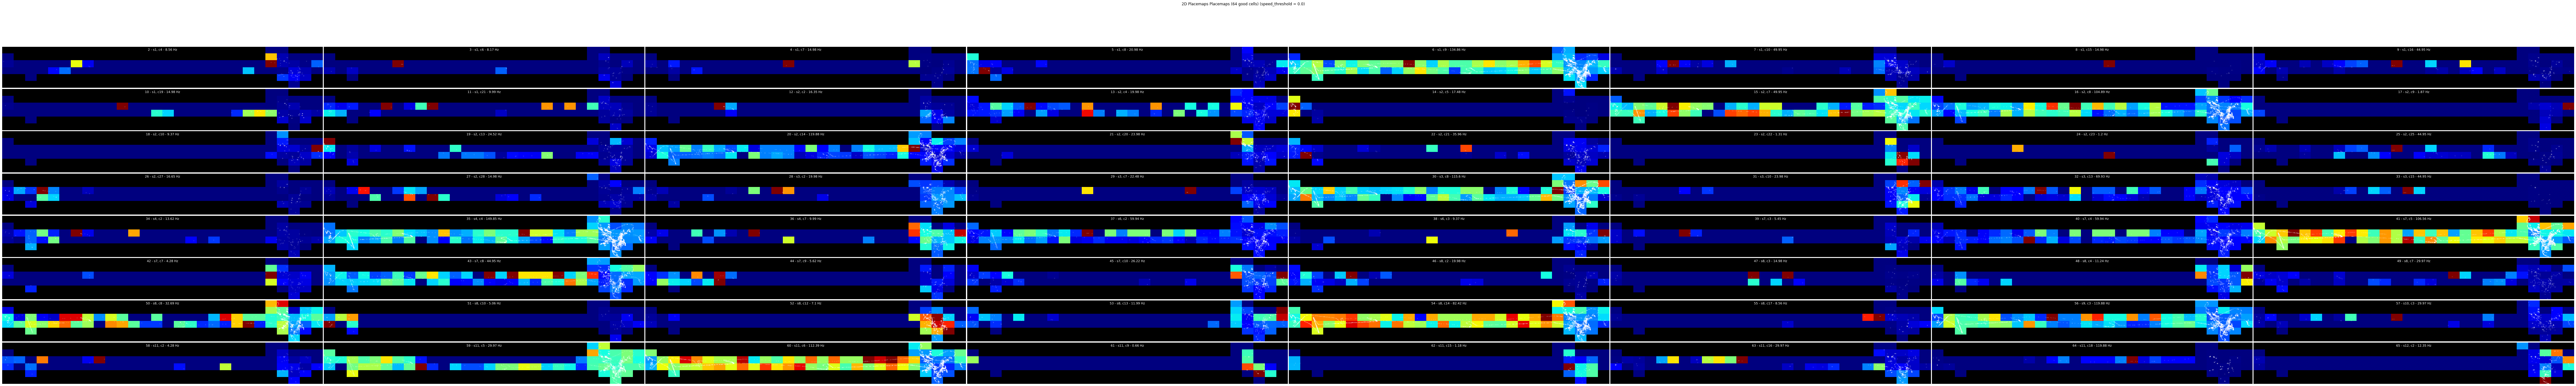

In [6]:
_display_result(curr_kdiba_pipeline.computation_results['maze1'])
_display_result(curr_kdiba_pipeline.computation_results['maze2'])